# Logic gates

Quick implementation and visualisation of four basing logic gates using perceptron:

* AND gate

* NAND gate

* OR gate

* NOR gate

## Imports

In [12]:
import numpy as np
from matplotlib import pyplot as plt

## Class definition

In [23]:
class Neuron:
  
  def __init__(self, input : list[int], weights : list[int],  T : int):
    
    self.input = np.array(input)
    self.weights = np.array(weights)
    self.T = T
    
  def forward(self) -> int:  
    """
    Calculates output value of single neuron for defined input,
    weight and treshold value using binary activation function.
    """
    weighted_sum = sum(self.input * self.weights)
    return 0 if weighted_sum < self.T else 1


class LogicGate:
  
  def __init__(self, input : list[int]):
    self.input = np.array(input)

  def and_gate(self) -> int:
    """
    Calculates output value for and gate. 
    """
    n1_val = Neuron(input = self.input,
                    weights = [1, 1],
                    T = 2).forward()
    return n1_val
  
  def or_gate(self) -> int:   
    """
    Calculates output value for or gate. 
    """   
    n1_val = Neuron(input = self.input,
                    weights = [1, 1],
                    T = 1).forward()
    return n1_val

  def nor_gate(self) -> int:
    """
    Calculates output value for nor gate. 
    """
    n1_val = Neuron(input = self.input,
                    weights = [1, 1],
                    T = 1).forward()
    
    n2_val = Neuron(input = np.array([n1_val]),
                    weights = [-1],
                    T = 0).forward()
    return n2_val

  def nand_gate(self) -> int:
    """
    Calculates output value for nand gate.
    """
    n1_val = Neuron(input = self.input[0],
                    weights = [-1],
                    T = 0).forward()
    
    n2_val = Neuron(input = self.input[1],
                    weights = [-1],
                    T = 0).forward()
    
    n3_val = Neuron(input = [n1_val, n2_val],
                    weights = [1,1],
                    T = 1).forward()
    return n3_val

## Demo

In [24]:
t1 = np.array([1,0,1,0])
t2 = np.array([1,1,0,0])

In [25]:
Neuron(input=[1,1], weights=[1,1], T = 1).forward()

1

In [26]:
print('AND gate results:')
for x1, x2 in zip(t1, t2):
    gate = LogicGate(np.array([x1, x2]))
    print(f'input: {x1}, {x2} -> and_gate: {gate.and_gate()}')
print('-' * 87)
print('NAND gate results:')
for x1, x2 in zip(t1, t2):
    gate = LogicGate(np.array([x1, x2]))
    print(f'input: {x1}, {x2} -> nand_gate: {gate.nand_gate()}')
print('-' * 87)
print('OR gate results:')
for x1, x2 in zip(t1, t2):
    gate = LogicGate(np.array([x1, x2]))
    print(f'input: {x1}, {x2} -> or_gate: {gate.or_gate()}')
print('-' * 87)
print('NOR gate results:')
for x1, x2 in zip(t1, t2):
    gate = LogicGate(np.array([x1, x2]))
    print(f'input: {x1}, {x2} -> nor_gate: {gate.nor_gate()}')

AND gate results:
input: 1, 1 -> and_gate: 1
input: 0, 1 -> and_gate: 0
input: 1, 0 -> and_gate: 0
input: 0, 0 -> and_gate: 0
---------------------------------------------------------------------------------------
NAND gate results:
input: 1, 1 -> nand_gate: 0
input: 0, 1 -> nand_gate: 1
input: 1, 0 -> nand_gate: 1
input: 0, 0 -> nand_gate: 1
---------------------------------------------------------------------------------------
OR gate results:
input: 1, 1 -> or_gate: 1
input: 0, 1 -> or_gate: 1
input: 1, 0 -> or_gate: 1
input: 0, 0 -> or_gate: 0
---------------------------------------------------------------------------------------
NOR gate results:
input: 1, 1 -> nor_gate: 0
input: 0, 1 -> nor_gate: 0
input: 1, 0 -> nor_gate: 0
input: 0, 0 -> nor_gate: 1


## Logic gates outcomes visualization

In [17]:
# create colors for points
colors_nor, colors_or, colors_and, colors_nand = [], [], [], []
for x1, x2 in zip(t1, t2):
  res_or = LogicGate([x1, x2]).or_gate()
  res_nor = LogicGate([x1, x2]).nor_gate()
  res_and = LogicGate([x1, x2]).and_gate()
  res_nand = LogicGate([x1, x2]).nand_gate()
  colors_nor.append('g' if res_nor == 1 else 'r')
  colors_or.append('g' if res_or == 1 else 'r')
  colors_and.append('g' if res_and == 1 else 'r')
  colors_nand.append('g' if res_nand == 1 else 'r')
  

C:\Users\Wiktor\AppData\Local\Temp\ipykernel_12352\3706977884.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


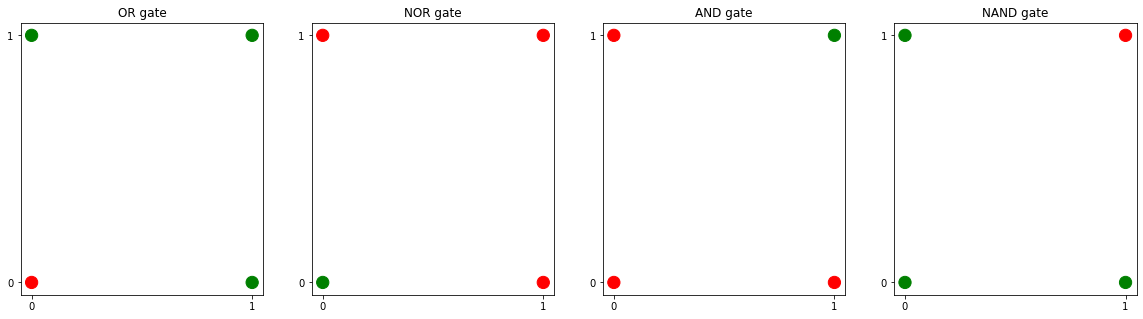

In [28]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))

ax[0].scatter(t1, t2, c = colors_or, s = 150)
ax[0].set_title('OR gate')
ax[0].set_xticks((0, 1))
ax[0].set_yticks((0, 1))

ax[1].scatter(t1, t2, c = colors_nor, s = 150)
ax[1].set_title('NOR gate')
ax[1].set_xticks((0, 1))
ax[1].set_yticks((0, 1))

ax[2].scatter(t1, t2, c = colors_and, s = 150)
ax[2].set_title('AND gate')
ax[2].set_xticks((0, 1))
ax[2].set_yticks((0, 1))

ax[3].scatter(t1, t2, c = colors_nand, s = 150)
ax[3].set_title('NAND gate')
ax[3].set_xticks((0, 1))
ax[3].set_yticks((0, 1))

fig.show()

In [29]:
fig.savefig('plot.jpg')